In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('train.csv')
df.shape[1]
# print(df['SalePrice'].describe())
df_clean = df.copy()
miss_col = df_clean.columns[df.isnull().any()].tolist()

df_clean = df.copy()
basement_na_list = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fireplace_na_liat = ['FireplaceQu']
garage_na_list = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
pool_na_list = ['PoolQC']
fence_na_list = ['Fence']
misfeature_na_list = ['MiscFeature']

for missing in miss_col:
    if missing == 'Alley':
        df_clean['Alley'] = df_clean['Alley'].replace(np.nan,'No alley access')
    elif missing in basement_na_list:
        df_clean.loc[:,basement_na_list] = df_clean.loc[:,basement_na_list].replace(np.nan,'No basement')
    elif missing in fireplace_na_liat:
        df_clean.loc[:,fireplace_na_liat] = df_clean.loc[:,fireplace_na_liat].replace(np.nan,'No fireplace')
    elif missing in garage_na_list:
        df_clean.loc[:,garage_na_list] = df_clean.loc[:,garage_na_list].replace(np.nan,'No garage')
    elif missing in pool_na_list:
        df_clean.loc[:,pool_na_list] = df_clean.loc[:,pool_na_list].replace(np.nan,'No pool')
    elif missing in fence_na_list:
        df_clean.loc[:,fence_na_list] = df_clean.loc[:,fence_na_list].replace(np.nan,'No fence')
    elif missing in misfeature_na_list:
        df_clean.loc[:,misfeature_na_list] = df_clean.loc[:,misfeature_na_list].replace(np.nan,'None')


df_clean.isnull().sum()
miss_col_clean = df_clean.columns[df_clean.isnull().any()].tolist()
# print(miss_col_clean)
# df_clean.loc[:, miss_col_clean].isnull().sum()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

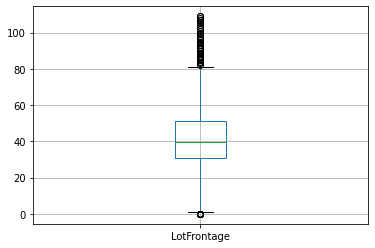

In [4]:
from sklearn.impute import KNNImputer

df_clean.loc[:, miss_col_clean] = df_clean.loc[:, miss_col_clean].apply(lambda series: pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))
df_clean.loc[:, miss_col_clean]
# df_clean.isnull().sum()

imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')
After_imputation = imputer.fit_transform(df_clean.loc[:, miss_col_clean])
After_imputation = pd.DataFrame(After_imputation, index=df_clean.loc[:, miss_col_clean].index, columns=df_clean.loc[:, miss_col_clean].columns)
After_imputation

df_after = df_clean.drop(miss_col_clean, axis=1)
# df_after
df_knn_imp = pd.concat([df_after, After_imputation], axis=1, join='inner')
df_knn_imp
# df_after.to_csv('df_clean.csv', encoding='utf-8', index=False)
boxplot = df_knn_imp.boxplot(column=['LotFrontage'])  

df_knn_imp['SalePrice'].describe()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

def cv_decision_tree(x, y, kfold):
    clf = DecisionTreeClassifier()
    k_folds = KFold(n_splits = kfold)
    scores = cross_val_score(clf, x, y, cv = k_folds)
    # print(scores)
#     print('Average CV: ',scores.mean())
    return scores.mean()

X_knn = df_knn_imp.loc[:, df_knn_imp.columns != 'SalePrice']
X_knn = X_knn.drop(['Id'], axis=1)
y_knn = df_knn_imp['SalePrice']

X_knn

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt
0,60,RL,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,36.0,1.0,128.0,4.0,89.0
1,20,RL,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,51.0,2.0,0.0,4.0,62.0
2,60,RL,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,39.0,1.0,104.0,4.0,87.0
3,70,RL,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,31.0,2.0,0.0,4.0,84.0
4,60,RL,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,55.0,1.0,221.0,4.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,8,2007,WD,Normal,33.0,2.0,0.0,4.0,85.0
1456,20,RL,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2010,WD,Normal,56.0,3.0,72.0,4.0,64.0
1457,70,RL,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,2500,5,2010,WD,Normal,37.0,2.0,0.0,4.0,29.0
1458,20,RL,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,4,2010,WD,Normal,39.0,2.0,0.0,0.0,36.0


In [10]:
is_string = []
for index in range(X_knn.shape[1]):
    data = X_knn.iloc[:,index]
    is_string.append(is_string_dtype(data))
# print(is_string)

index_numerical = [i for i, istring in enumerate(is_string) if istring == False]
# print(index_false)
index_string = [i for i, istring in enumerate(is_string) if istring == True]

# X_knn.iloc[:,index_string]
X_knn_enc = X_knn.copy()
for col in index_string:
    labelencoder = LabelEncoder()
    X_knn_enc.iloc[:,col] = labelencoder.fit_transform(X_knn_enc.iloc[:,col])

X_knn_enc
print('Avr. CV of knn imputation: ',cv_decision_tree(X_knn_enc, y_knn, 10))

df_knn_imp = pd.concat([X_knn_enc, df_clean['SalePrice']], axis=1)
# df_knn_imp

Avr. CV of knn imputation:  0.008904109589041096


,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt,SalePrice
0,60,3,8450,1,1,3,3,0,4,0,...,2,2008,8,4,36.0,1.0,128.0,4.0,89.0,208500
1,20,3,9600,1,1,3,3,0,2,0,...,5,2007,8,4,51.0,2.0,0.0,4.0,62.0,181500
2,60,3,11250,1,1,0,3,0,4,0,...,9,2008,8,4,39.0,1.0,104.0,4.0,87.0,223500
3,70,3,9550,1,1,0,3,0,0,0,...,2,2006,8,0,31.0,2.0,0.0,4.0,84.0,140000
4,60,3,14260,1,1,0,3,0,2,0,...,12,2008,8,4,55.0,1.0,221.0,4.0,86.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,1,3,3,0,4,0,...,8,2007,8,4,33.0,2.0,0.0,4.0,85.0,175000
1456,20,3,13175,1,1,3,3,0,4,0,...,2,2010,8,4,56.0,3.0,72.0,4.0,64.0,210000
1457,70,3,9042,1,1,3,3,0,4,0,...,5,2010,8,4,37.0,2.0,0.0,4.0,29.0,266500
1458,20,3,9717,1,1,3,3,0,4,0,...,4,2010,8,4,39.0,2.0,0.0,0.0,36.0,142125


In [ ]:
df_knn_imp.to_csv('df_knn_imp.csv', encoding='utf-8', index=False)